This programming exercise is from the textbook [Think Complexity, 2nd edition](https://thinkcomplex.com) by Allen Downey. This book is distributed under the [MIT License](http://opensource.org/licenses/MIT).

Some computer code from the textbook were also reused and modified for the purposes of this exercise. These reused computer code are indicated in the solution for this exercise and are still credited to the author.

**Exercise:** NetworkX provides a function called `powerlaw_cluster_graph` that implements the "Holme and Kim algorithm for growing graphs with powerlaw degree distribution and approximate average clustering".  Read the documentation of this function and see if you can use it to generate a graph that has the same number of nodes as the Facebook network, the same average degree, and the same clustering coefficient.  How does the degree distribution in the model compare to the actual distribution?

# Solution goes here

The function`powerlaw_graph` creates a cluster graph using the functionality provided by NetworkX with the default parameters `n = 4039`, `k = 22`, and `p = 0` as provided by the textbook. The function `degrees` then provides a list containing the degree of each node in the graph `G`. This functionality is again provded by the package NetworkX. Lastly, the package `thinkstats2` conveniently provides a function `Pmf` that can be used to generate a probability mass function (pmf) from a given list.

In [1]:
import networkx as nx
import numpy as np
from networkx.algorithms.approximation import average_clustering
import thinkstats2
import matplotlib.pyplot as plt
#import math
import thinkplot

"""
This generates the powerlaw graph with the needed parameters which are 4039 nodes with 22 random edges for each node.
"""

def powerlaw_graph(n = 4039, k = 22, p = 0):
    g = nx.powerlaw_cluster_graph(n, k, p)
    
    return g

"""
This generates the degree per node of the graph G (same as in the textbook)
"""

def degrees(G):
    
    return [G.degree(u) for u in G]

g = powerlaw_graph(4039, 22, 0.9)

pmf_plaw = thinkstats2.Pmf(degrees(g))

print(pmf_plaw.Mean(), pmf_plaw.Std(), average_clustering(g))

43.69992572418916 40.85499424289771 0.113


|                        | Dataset | Powerlaw graph |
|------------------------|:-------:|:--------------:|
| Mean degree            |   43.7  |      43.7      |
| Standard deviation     |   52.4  |      40.85     |
| Clustering coefficient |   0.61  |      0.113     |

As can be seen from the table above, although the standard deviation and mean degree of the powerlaw graph are either somewhat close or is exactly the same as in the provided dataset, the computed clustering coefficient of the powerlaw graph is very far from the actual value from the dataset. The value of the clustering coefficient here is actually dependent on the probability $p$ as shown in the following graph:

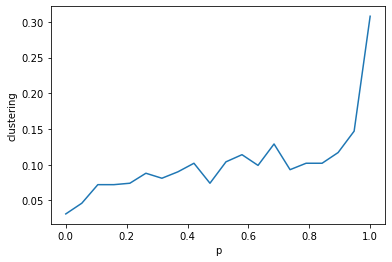

In [3]:
x_data = np.linspace(0,1,20)
y_data = [average_clustering(powerlaw_graph(4039, 22, k)) for k in x_data]

plt.plot(x_data,y_data)
plt.xlabel('p')
plt.ylabel('clustering')
plt.show()

From this plot, it can be seen that the clustering coefficient for the powerlaw graph does not come close to the actual value of the clustering coefficient of the dataset.

The following plot provides a comparison between the value of the PMF and the degree:

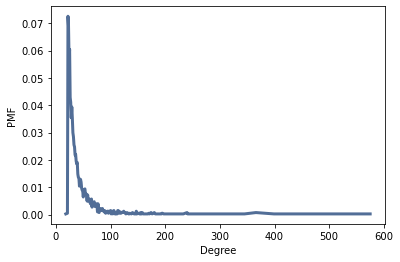

In [4]:
thinkplot.Pdf(pmf_plaw)
plt.xlabel('Degree')
plt.ylabel('PMF')
plt.show()

Compared to the degree distribution of the Facebook data as show in figure 4.1, it can be seen that these two plots are similar.

The following code generates a log-log graph of the CDF of the degree from the powerlaw graph:

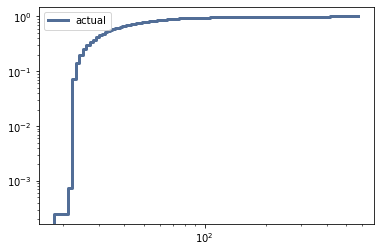

<Figure size 576x432 with 0 Axes>

In [5]:
"""
This generates the required dataset for the CDF plot

This part of the code will be reused for exercise 4.3
"""

cdf_deg = thinkstats2.Cdf(degrees(g), label='actual')

"""
This generates the CDF plot in a log-x scale
"""

thinkplot.cdf(cdf_deg)
thinkplot.show(xscale='log', yscale='log')

This shows that the $\text{log}(CDF)$ sharply increases between $ 10^1 $ and $ 10^2 $ similar to the plot given in figure 4.4 in the textbook.

Lastly, the next code generates the CCDF plot of the degree from the powerlaw graph:

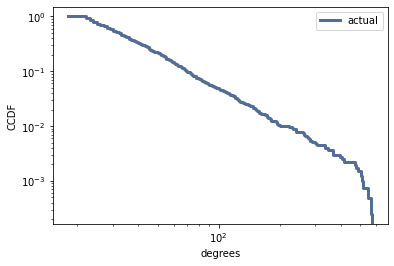

<Figure size 576x432 with 0 Axes>

In [6]:
"""
This generates the CCDF plot using the thinkplot
"""

thinkplot.cdf(cdf_deg, complement=True)
thinkplot.show(xlabel = 'degrees', ylabel = 'CCDF', yscale='log', xscale='log')

The CCDF plot is very different as compared to the Facebook dataset found in figure 4.5 in the textbook.